### How aligned is the decoder for choice (chose feature or not) to the one for preference? Prefers feature or not?
- Look at correct trials (optionally pref chosen)
- evaluate cosine similarity of the two decoders


In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.single_selected_feature_configs import *
from scripts.pseudo_decoding.ccgp_value_configs import *
import scipy
import argparse
import copy

### Load choice decoder: 


In [8]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"
args.trial_event = "FeedbackOnsetLong"


models = io_utils.read_selected_features_models(args, FEATURES, "pref")
choice_weights = io_utils.get_selected_features_weights(models)

### Load preference decoder

In [9]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"
args.trial_event = "FeedbackOnsetLong"


models = io_utils.read_selected_features_models(args, FEATURES, "pref_vs_not_pref")
pref_weights = io_utils.get_selected_features_weights(models)

<Axes: xlabel='Time', ylabel='cosine_sim'>

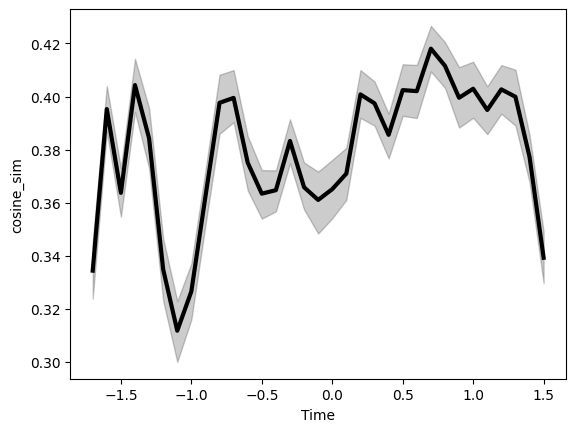

In [10]:
fig, ax = plt.subplots()
res = classifier_utils.get_cross_cond_cosine_sim_of_weights(pref_weights, choice_weights)
sns.lineplot(res, x="Time", y="cosine_sim", color="black", linewidth=3, ax=ax)